In [52]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import seaborn as sns

# Load the data
NFdata = pd.read_csv(r'C:/Users/Admin/OneDrive/Documents/Drexel/MEM679/Homework3/netflix_titles.csv')

This a dataset from Kaggle that has a listing of movies/shows on Netflix. This was a better way of practicing plotting than using my own data.  

In [ ]:
# Replace NaN values with empty string
NFdata["duration"] = NFdata["duration"].fillna("")

# Extract the runtime from the 'duration' column (TV Shows ignored as data given in seasons)
NFdata['runtime'] = NFdata['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else None)

# Exclude movies with no runtime data
NFdata = NFdata.dropna(subset=['runtime'])

# Calculate the average and standard deviation of runtime each year
runtime_stats = NFdata.groupby('release_year')['runtime'].agg(['mean', 'std']).reset_index()
runtime_stats.columns = ['release_year', 'mean_runtime', 'std_runtime']

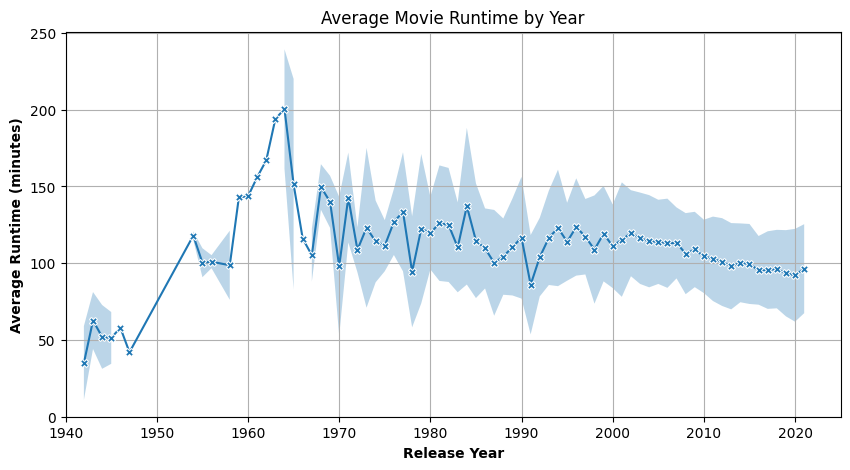

In [75]:
# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=runtime_stats, x='release_year', y='mean_runtime', marker='X')

# Stardard Deviation
plt.fill_between(runtime_stats['release_year'], 
                 runtime_stats['mean_runtime'] - runtime_stats['std_runtime'], 
                 runtime_stats['mean_runtime'] + runtime_stats['std_runtime'], 
                 alpha=0.3, label='Standard Deviation')

# Labels and title
plt.xlabel('Release Year', fontweight='bold')
plt.ylabel('Average Runtime (minutes)', fontweight='bold')
plt.title('Average Movie Runtime by Year')

plt.xlim(1940,2025) 
plt.ylim(0) 
plt.grid(True)
plt.show()

Simple first graph, made sure not to suppress the zero. No other special condsiderations (such as for color or scale) necessary. Standard Deviation is also shown.

C:\Users\Admin\AppData\Local\Temp\ipykernel_15652\3707553753.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='count', y='genre', palette='viridis')


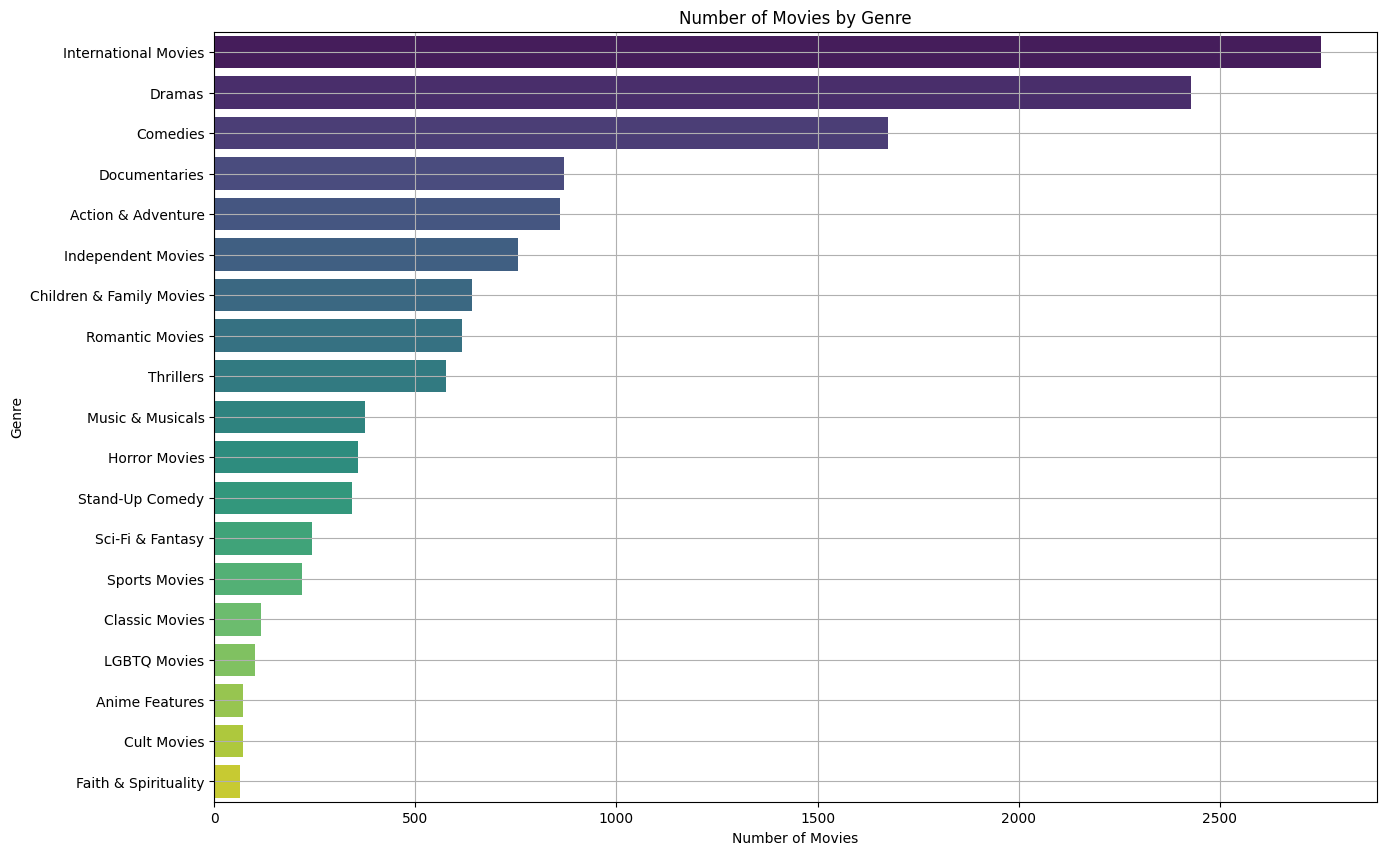

In [76]:
# Show only movies
NFdata = NFdata[NFdata['type'] == 'Movie']

# Replace NaN values with an empty string
NFdata["listed_in"] = NFdata["listed_in"].fillna("")

# Split columns with multiple category entries into list
NFdata['genres'] = NFdata['listed_in'].str.split(", ")

# Explode lists to create a row for each genre
NFdata_exploded = NFdata.explode('genres')

# Count each genre
genre_counts = NFdata_exploded['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Exclude genre listed as 'Movies'
genre_counts = genre_counts[genre_counts['genre'] != 'Movies']

# Create bar chart 
plt.figure(figsize=(15, 10))
sns.barplot(data=genre_counts, x='count', y='genre', palette='viridis')

# Labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Number of Movies by Genre')
plt.grid(True)

plt.show()

A bar graph was used to compare different categories. Viridis color palette was chosen to show a range of values. 